# **Graph Algorithms - Search**

## **Definitions**

A **path** in a graph *G=(V,E)* is a sequence of vertices *v0,v1,v2,…,vn* of length greater than 1 such that:

```
For 0 < i < n:
  (vi-1,vi) is in E
```


For example, if G is the graph in the image:

0,1 is a path in G

1,2,3  is a path in G

2,3,4,1,2 is a path in G

1,0,2,3,4 is NOT a path in G

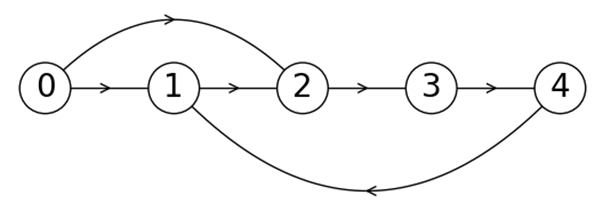

In an undirected graph *G=(V,E)*, vertices *u* and *v* are **connected** if there is a path from *u* to *v* in *G*.
For example, if *G* is the graph in the image

Vertices 2 and 4 are connected

Vertices 3 and 5 are connected

Vertices 0 and 5 are NOT connected

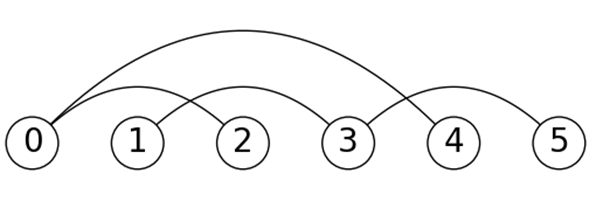

A **cycle** in a graph G=(V,E) is a path v0,v1,v2,…,vn of length greater than 1 where v0=vn 

For example, if G is the graph in the image

2,3,4,1,2 is a cycle in G

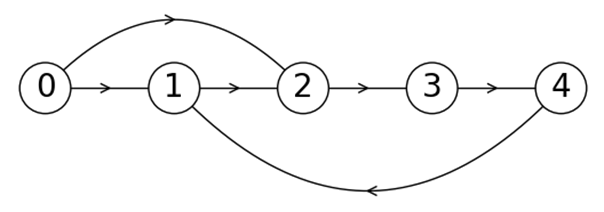

The cost of a path is the sum of the weights of the edges in the path.

In an unweighted graph this is equivalent to the number of edges in the path.

The cost of path 0,1,2,3 in the graph below is 7 (4+2+1).


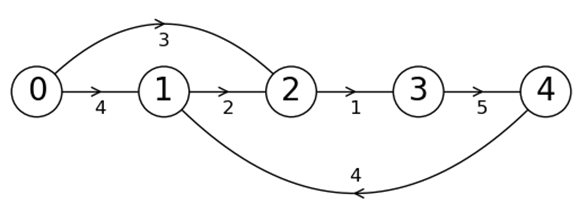


The shortest path from vertex u to vertex v is the path from u to v with minimum cost.

For the graph above, the shortest path from 0 to 3 is (0,2,3), with a cost of 4 (3+1).


The goal of **graph search** is to find a **path** from a source vertex to every vertex in the graph. 

In some cases, we are also interested in finding the **shortest path** from a source to every vertex in the graph. 

For example, if G is the graph below and the source vertex is 0, a graph search algorithm may find the following paths to vertices 0 to 6:

[0]

[0,1]

[0,2]

[0,2,3]

[0,1,4]

[0,1,4,5]

[0,2,3,6]

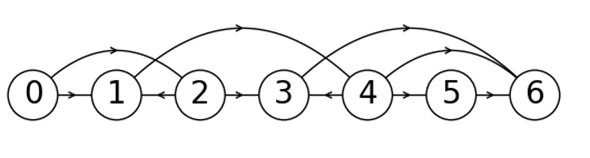

**Encoding a path**

Notice that paths share from a source to other vertices share edges.

For example, in the graph above, the path from 0 to 6 in the graph above is [0,2,3] + [6], where [0,2,3] is the path from 0 to 3.

Similarly, the path from 0 to 3 in the graph above is [0,2] + [3], where [0,2] is the path from 0 to 2.

Thus, we can encode all paths using a single list (or array) by just storing the next-to-last vertex in the path (the one before the destination). 

For the grapha above, those are the paths to each of the vertices:

[0]

[0,1]

[0,2]

[0,2,3]

[0,1,4]

[0,1,4,5]

[0,2,3,6]

We store the next to last element in each path in a list called prev:

*prev = [-1, 0, 0, 2, 1, 4, 3]*

We set *prev[origin]* to -1, since the path to the origin has only one vertex. 

Given prev, the complete path can be retrieved as follows:


```
def get_path(prev,v):
    if prev[v]<0:   # v is the origin
        return [v]
    return get_path(prev,prev[v]) + [v]
```

Thus for example, to find the path to vertex 6:

get_path(prev,6) = get_path(prev,3) + [6]

get_path(prev,3) = get_path(prev,2) + [3]

get_path(prev,2) = get_path(prev,0) + [2]

get_path(prev,0) = [0]

Thus 

get_path(prev,2) = [0, 2]

get_path(prev,3) = [0, 2, 3]

and

get_path(prev,6) = [0, 2, 3, 6]


## **Breadth-first Search**

**Idea:**

Start at the source, mark the source as the prev of all of its neighbors.

Then for each neighbor v of the source, mark v as the prev of all of its neighbors.

The continue with the neighbors of the neighbors of the source, 

This idea can be implemented easily using a queue.

We also need a set to keep track of vertices that have already been visited, so we don't continue searching indefinitely. 

When the search is done, prev will encode the path to all vertices. prev[source] is -1; but if prev[v] =-1 and v!= source, then there is no path from the source to v. 

The complete code is as follows:


In [1]:
def breadth_first_search(G,source=0):
    visited = set([source])
    prev = [-1 for i in range(len(G.AL))]
    Q = [source]
    while len(Q)>0:
        u = Q.pop(0) # Dequeue next vertex to expand
        for edge in G.AL[u]:
            if edge.dest not in visited:  # Mark vertex as visited, set its prev value appropriately, and add it to the Queue.
                prev[edge.dest] = u
                visited.add(edge.dest)
                Q.append(edge.dest)
    return prev

We will use the code to generate random graphs.

In [11]:
def sort_ALS(G):
    for v in range(len(G.AL)):
        dests = [edge.dest for edge in G.AL[v]]
        ind = np.argsort(dests)
        al = [G.AL[v][i] for i in ind]
        G.AL[v] = al

def random_graph(nv,ne,weighted=False, directed = False,seed=-1,rep='AL'):
    if seed>=0:
        np.random.seed(seed)
    G=graph_AL.Graph(nv,weighted=weighted, directed = directed)
    edges = set()
    ne = min(ne,nv*(nv-1)//2)
    while len(edges) < ne:
        source = np.random.randint(nv)
        dest = (np.random.randint(1,nv)+source)%nv
        if (source,dest) not in edges and (dest,source) not in edges:
            edges.add((source,dest))
    w=1            
    for edge in edges:
        if weighted:
            w = np.random.randint(1,10)
        G.insert_edge(edge[0],edge[1],w)
    sort_ALS(G)
    return G


And functions to generate the paths and to display them, indicating also if there is no path to a particular vertex.

In [12]:
def get_path(prev,v):
    if prev[v]<0:   # v is the origin
        return [v]
    return get_path(prev,prev[v]) + [v]

def print_paths(prev,source=0):
    print('Paths:')
    for v in range(len(prev)):
        p = get_path(prev,v)
        if p[0] ==source:
            print(v,':',get_path(prev,v))
        else:
            print('there is no path from',source,'to',v)

We also need the adjacency list implementation of graphs

In [13]:
from google.colab import files
uploaded = files.upload() # Upload graph_AL

ModuleNotFoundError: No module named 'google'

Now we can try breadth-first search on random graphs

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import graph_AL

G representation
directed: True, weighted: False
Adjacency list:
AL[0]=[(1,1), (2,1), (3,1)]
AL[1]=[(2,1), (4,1)]
AL[2]=[(3,1)]
AL[3]=[(1,1), (5,1)]
AL[4]=[(2,1)]
AL[5]=[(2,1)]
Breadth-first search results
[-1, 0, 0, 0, 1, 3]
Paths:
0 : [0]
1 : [0, 1]
2 : [0, 2]
3 : [0, 3]
4 : [0, 1, 4]
5 : [0, 3, 5]


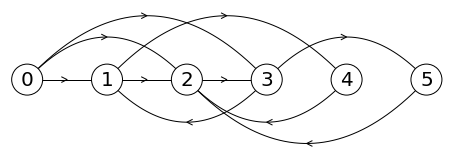

In [15]:
G1 = random_graph(6,10,directed=True,seed=2302)
G1.draw()
G1.display('G')
prev = breadth_first_search(G1)
print('Breadth-first search results')
print(prev)
print_paths(prev)

Now let's run a version of the code that prints all intermediate results, in order to understand better how the algorithm works. 

In [16]:
def breadth_first_search(G,source=0):
    visited = set([source])
    prev = [-1 for i in range(len(G.AL))]
    Q = [source]
    while len(Q)>0:
        print('Q =',Q)
        v = Q.pop(0)
        print('v =',v)
        for edge in G.AL[v]:
            if edge.dest not in visited:
                prev[edge.dest] = v
                visited.add(edge.dest)
                Q.append(edge.dest)
        print('prev =',prev)
        print('visited =',visited)
    return prev

G representation
directed: True, weighted: False
Adjacency list:
AL[0]=[(1,1), (2,1), (3,1)]
AL[1]=[(2,1), (4,1)]
AL[2]=[(3,1)]
AL[3]=[(1,1), (5,1)]
AL[4]=[(2,1)]
AL[5]=[(2,1)]
Breadth-first search results
[-1, 0, 0, 0, 1, 3]
Paths:
0 : [0]
1 : [0, 1]
2 : [0, 2]
3 : [0, 3]
4 : [0, 1, 4]
5 : [0, 3, 5]


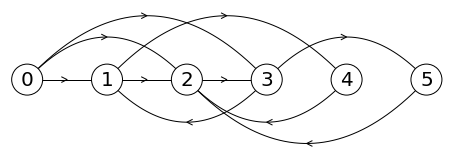

In [9]:
G1 = random_graph(6,10,directed=True,seed=2302)
G1.draw()
G1.display('G')
prev = breadth_first_search(G1,source=0)
print('Breadth-first search results')
print(prev)
print_paths(prev)

## **Depth-first Search**

**Idea:**

Use recursion. Apply depth-first search starting at the source, then move to the source's first neighbor, and then to the source's first neighbor first neighbor. 

In [17]:
def depth_first_search(G,source=0,visited=None,prev=None):
    if visited==None:
        visited = set()
    if prev ==None:
        prev = [-1 for i in range(len(G.AL))]
    visited.add(source)
    for edge in G.AL[source]:
        if edge.dest not in visited:
            prev[edge.dest] = source
            depth_first_search(G,edge.dest,visited,prev)
    return prev

G representation
directed: True, weighted: False
Adjacency list:
AL[0]=[(1,1), (2,1), (3,1)]
AL[1]=[(2,1), (4,1)]
AL[2]=[(3,1)]
AL[3]=[(1,1), (5,1)]
AL[4]=[(2,1)]
AL[5]=[(2,1)]
source= 0
prev = [-1, -1, -1, -1, -1, -1]
visited = {0}
source= 1
prev = [-1, 0, -1, -1, -1, -1]
visited = {0, 1}
source= 2
prev = [-1, 0, 1, -1, -1, -1]
visited = {0, 1, 2}
source= 3
prev = [-1, 0, 1, 2, -1, -1]
visited = {0, 1, 2, 3}
source= 5
prev = [-1, 0, 1, 2, -1, 3]
visited = {0, 1, 2, 3, 5}
source= 4
prev = [-1, 0, 1, 2, 1, 3]
visited = {0, 1, 2, 3, 4, 5}
Depth-first search results
[-1, 0, 1, 2, 1, 3]
Paths:
0 : [0]
1 : [0, 1]
2 : [0, 1, 2]
3 : [0, 1, 2, 3]
4 : [0, 1, 4]
5 : [0, 1, 2, 3, 5]


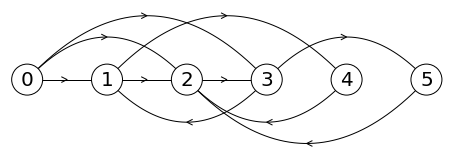

In [26]:
G1 = random_graph(6,10,directed=True,seed=2302)
G1.draw()
G1.display('G')
prev = depth_first_search(G1,source=0)
print('Depth-first search results')
print(prev)
print_paths(prev)

Now let's run a version of the code that prints all intermediate results, in order to understand better how the algorithm works.

In [19]:
def depth_first_search(G,source=0,visited=None,prev=None):
    if visited==None:
        visited = set()
    if prev ==None:
        prev = [-1 for i in range(len(G.AL))]
    visited.add(source)
    print('source=',source)
    print('prev =',prev)
    print('visited =',visited)
    for edge in G.AL[source]:
        if edge.dest not in visited:
            prev[edge.dest] = source
            depth_first_search(G,edge.dest,visited,prev)
    return prev

G representation
directed: True, weighted: False
Adjacency list:
AL[0]=[(1,1), (2,1), (3,1)]
AL[1]=[(2,1), (4,1)]
AL[2]=[(3,1)]
AL[3]=[(1,1), (5,1)]
AL[4]=[(2,1)]
AL[5]=[(2,1)]
source= 0
prev = [-1, -1, -1, -1, -1, -1]
visited = {0}
source= 1
prev = [-1, 0, -1, -1, -1, -1]
visited = {0, 1}
source= 2
prev = [-1, 0, 1, -1, -1, -1]
visited = {0, 1, 2}
source= 3
prev = [-1, 0, 1, 2, -1, -1]
visited = {0, 1, 2, 3}
source= 5
prev = [-1, 0, 1, 2, -1, 3]
visited = {0, 1, 2, 3, 5}
source= 4
prev = [-1, 0, 1, 2, 1, 3]
visited = {0, 1, 2, 3, 4, 5}
Depth-first search results
[-1, 0, 1, 2, 1, 3]
Paths:
0 : [0]
1 : [0, 1]
2 : [0, 1, 2]
3 : [0, 1, 2, 3]
4 : [0, 1, 4]
5 : [0, 1, 2, 3, 5]


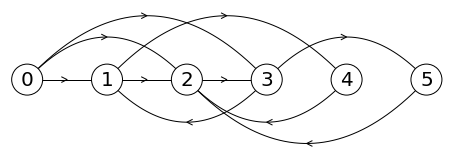

In [23]:
G1 = random_graph(6,10,directed=True,seed=2302)
G1.draw()
G1.display('G')
prev = depth_first_search(G1,source=0)
print('Depth-first search results')
print(prev)
print_paths(prev)

## **Exercises**

**Exercise 0.** Write a function path_lengths(G,source) that receives a graph G and a source vertex and returns a list containing the lengths of the paths from the source to every vertex in G found by breadth first search. If L is the list containing the path lengths, then L[source] should be 0. If there is no path from the source to a vertex v, then L[v] should be infinity. 

In [11]:
def  path_lengths(G,source=0):
  L=[]
  prev = breadth_first_search(G,source)
  if prev==source:
    return math.inf
  for v in range(len(prev)):
    p = get_path(prev,v)
    if p[0] ==source:
        L.append(v)
  return L

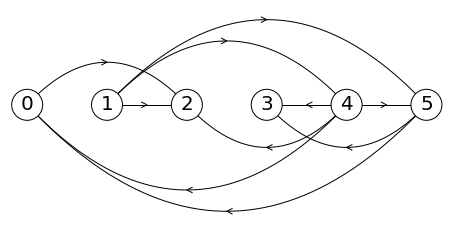

Q = [1]
v = 1
prev = [-1, -1, 1, -1, 1, 1]
visited = {1, 2, 4, 5}
Q = [2, 4, 5]
v = 2
prev = [-1, -1, 1, -1, 1, 1]
visited = {1, 2, 4, 5}
Q = [4, 5]
v = 4
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
Q = [5, 0, 3]
v = 5
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
Q = [0, 3]
v = 0
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
Q = [3]
v = 3
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
[0, 1, 2, 3, 4, 5]


In [12]:
G1 = random_graph(6,10,directed=True,seed=1)
G1.draw()
plt.show()
print(path_lengths(G1,1))

**Exercise 1.** Write a function no_path(G,source) that receives a graph G and a source vertex and returns a list of the vertices v in G for which there is no path from source to v in G. For example, if G is the graph below, no_path(G,0) should return [1,6]. Use breadth-first search or depth-first search to find the paths. 

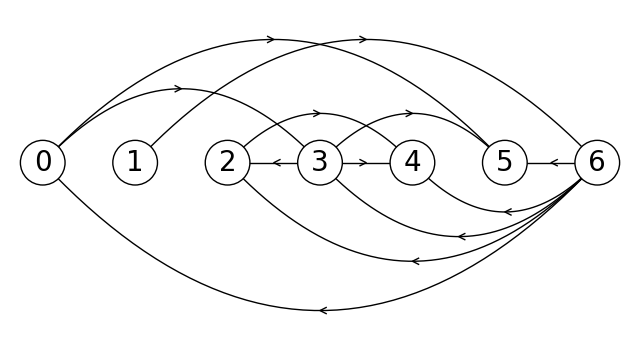

In [16]:
def no_path(G,source=0):
  L=[]
  prev = depth_first_search(G,source)
  for v in range(len(prev)):
    p = get_path(prev,v)
    if p[0] !=source:
        L.append(v)
  return L

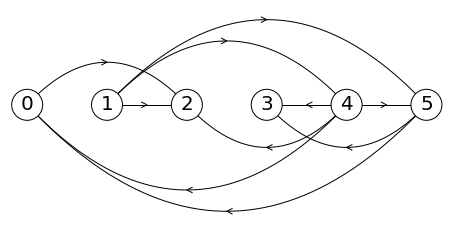

source= 0
prev = [-1, -1, -1, -1, -1, -1]
visited = {0}
source= 2
prev = [-1, -1, 0, -1, -1, -1]
visited = {0, 2}
0 [1, 3, 4, 5]
source= 1
prev = [-1, -1, -1, -1, -1, -1]
visited = {1}
source= 2
prev = [-1, -1, 1, -1, -1, -1]
visited = {1, 2}
source= 4
prev = [-1, -1, 1, -1, 1, -1]
visited = {1, 2, 4}
source= 0
prev = [4, -1, 1, -1, 1, -1]
visited = {0, 1, 2, 4}
source= 3
prev = [4, -1, 1, 4, 1, -1]
visited = {0, 1, 2, 3, 4}
source= 5
prev = [4, -1, 1, 4, 1, 4]
visited = {0, 1, 2, 3, 4, 5}
1 []
source= 2
prev = [-1, -1, -1, -1, -1, -1]
visited = {2}
2 [0, 1, 3, 4, 5]
source= 3
prev = [-1, -1, -1, -1, -1, -1]
visited = {3}
3 [0, 1, 2, 4, 5]
source= 4
prev = [-1, -1, -1, -1, -1, -1]
visited = {4}
source= 0
prev = [4, -1, -1, -1, -1, -1]
visited = {0, 4}
source= 2
prev = [4, -1, 0, -1, -1, -1]
visited = {0, 2, 4}
source= 3
prev = [4, -1, 0, 4, -1, -1]
visited = {0, 2, 3, 4}
source= 5
prev = [4, -1, 0, 4, -1, 4]
visited = {0, 2, 3, 4, 5}
4 [1]
source= 5
prev = [-1, -1, -1, -1, -1, -1]
visi

In [17]:
G1 = random_graph(6,10,directed=True,seed=1)
G1.draw()
plt.show()
for v in range(6):
  print(v,no_path(G1,v))

**Exercise 2.** Write the function longer_path(G,source) that receives a graph G and a source vertex and returns a list of the vertices v in G for which the path from source to v found by depth-first search is longer than the path found by breadth-first search.

In [26]:
def longer_path(G,source=0):
  LB=[]
  LD=[]
  prevB = breadth_first_search(G,source)
  prevD = depth_first_search(G,source)
  for v in range(len(prevB)):
    p = get_path(prevB,v)
    if p[0] ==source:
        LB.append(v)
  for v in range(len(prevD)):
    p = get_path(prevD,v)
    if p[0] ==source:
        LD.append(v)
  if len(LB)>len(LD):
    return LB
  return LD
  

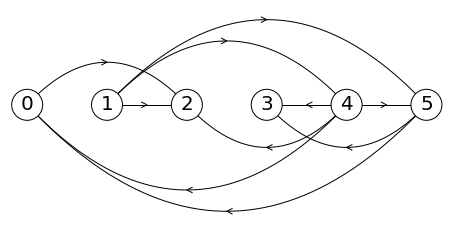

Q = [0]
v = 0
prev = [-1, -1, 0, -1, -1, -1]
visited = {0, 2}
Q = [2]
v = 2
prev = [-1, -1, 0, -1, -1, -1]
visited = {0, 2}
source= 0
prev = [-1, -1, -1, -1, -1, -1]
visited = {0}
source= 2
prev = [-1, -1, 0, -1, -1, -1]
visited = {0, 2}
0 [0, 2]
Q = [1]
v = 1
prev = [-1, -1, 1, -1, 1, 1]
visited = {1, 2, 4, 5}
Q = [2, 4, 5]
v = 2
prev = [-1, -1, 1, -1, 1, 1]
visited = {1, 2, 4, 5}
Q = [4, 5]
v = 4
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
Q = [5, 0, 3]
v = 5
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
Q = [0, 3]
v = 0
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
Q = [3]
v = 3
prev = [4, -1, 1, 4, 1, 1]
visited = {0, 1, 2, 3, 4, 5}
source= 1
prev = [-1, -1, -1, -1, -1, -1]
visited = {1}
source= 2
prev = [-1, -1, 1, -1, -1, -1]
visited = {1, 2}
source= 4
prev = [-1, -1, 1, -1, 1, -1]
visited = {1, 2, 4}
source= 0
prev = [4, -1, 1, -1, 1, -1]
visited = {0, 1, 2, 4}
source= 3
prev = [4, -1, 1, 4, 1, -1]
visited = {0, 1, 2, 3, 4}
source= 5
prev = [4, -1

In [27]:
G1 = random_graph(6,10,directed=True,seed=1)
G1.draw()
plt.show()
for source in np.arange(len(G1.AL)):
  print(source, longer_path(G1,source))


**Exercise 3.** Write the function best_source_bfs(G) that receives a graph G and returns the vertex v in G such that the combined length of all the paths from v to every vertex in G is minimized. For your computations, if there is no path from source vertex u to vertex v, then assume the length of that path is infinity. 


In [33]:
def best_source(G):
  L=[]
  for i in range(len(G)):
    prev = breadth_first_search(G,i)
    if prev==i:
      return math.inf
    for v in range(len(prev)):
      p = get_path(prev,v)
      if p[0] ==i:
        L.append(v)
  return set(L)

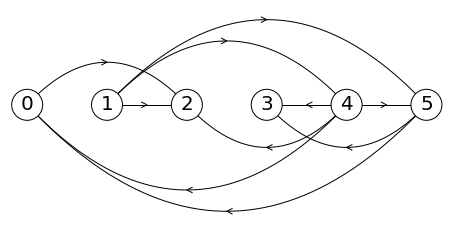

TypeError: object of type 'Graph' has no len()

In [34]:
G1 = random_graph(6,10,directed=True,seed=1)
G1.draw()
plt.show()
print(best_source(G1))